
### Here we Explore the data we have 
In this project, I’m working with data from the 2019 Survey of Consumer Finances (SCF), a survey by the US Federal Reserve that collects financial, demographic, and opinion data from U.S. families every three years.

link to the Data: (https://www.federalreserve.gov/econres/scfindex.htm)


In [2]:
# Importing  libraries 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Prepare Data

## Import

First we imported the data.

In [3]:
df = pd.read_csv("data/SCFP2022.csv")
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (22975, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


It is a huge data over 20000 rows and 357 columns.

For this project, we're going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years". These households are identified in the "TURNFEAR" column.

In [4]:
# Here we just filter the data for credit fearfull household
mask = df['TURNFEAR'] ==1
mask.sum()  # as mask is a boolean and the true value ==1 so we use .sum() method 



3839

In [5]:
# Here we just filter the data for credit fearfull household
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()


df_fear type: <class 'pandas.core.frame.DataFrame'>
df_fear shape: (3839, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


### Explore

## Age

Now that we have our subset, let's explore the characteristics of this group. One of the features is age group ("AGECL").

![My plot](image/agecl.png)

In [6]:
df_fear["AGECL"].unique()

array([1, 4, 2, 3, 5, 6])

In [7]:
# Determine the unique values in a column 
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [1 4 2 3 5 6]


"AGECL" is categorical despite having numeric values.

In [8]:
df_fear['AGECL'].head(10)

20     1
21     1
22     1
23     1
24     1
110    4
111    4
112    4
113    4
114    4
Name: AGECL, dtype: int64

In [9]:
# Create a Series agecl that contains the observations from "AGECL" using the true group names
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear['AGECL'].replace(agecl_dict)
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head(10)

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (3839,)


20     Under 35
21     Under 35
22     Under 35
23     Under 35
24     Under 35
110       55-64
111       55-64
112       55-64
113       55-64
114       55-64
Name: AGECL, dtype: object

In [10]:
# Now that we have better labels, let's make a bar chart and see the age distribution of our group.
age_cl.value_counts()

AGECL
35-44          936
Under 35       917
45-54          802
55-64          682
65-74          398
75 or Older    104
Name: count, dtype: int64

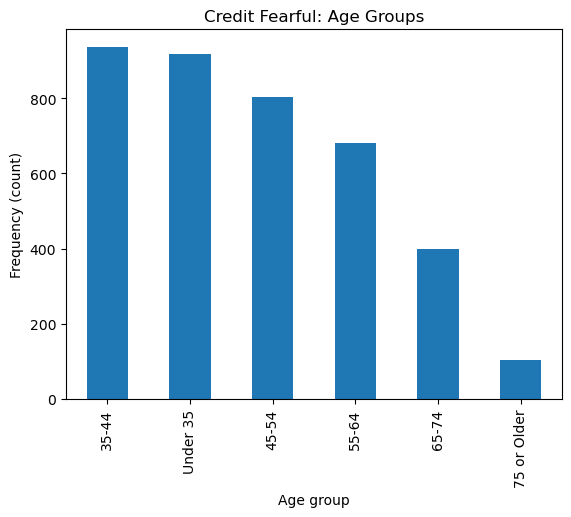

In [11]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of age_cl_value_counts

age_cl_value_counts.plot(
    kind = "bar",
    xlabel = "Age group",
    ylabel = "Frequency (count)",
    title = "Credit Fearful: Age Groups"

);

Text(0.5, 1.0, 'credit Fearful: Age Distribution')

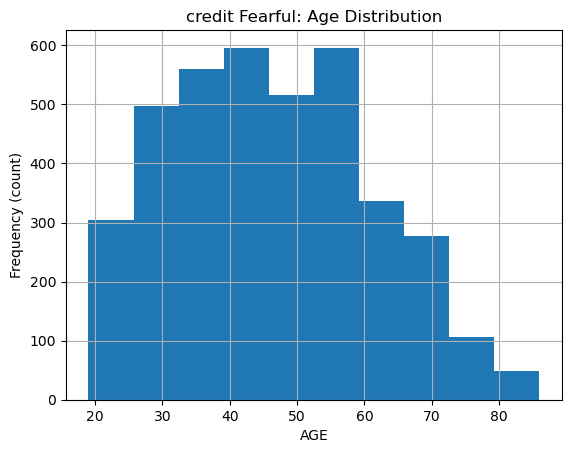

In [12]:
# Plot histogram of "AGE"
df_fear['AGE'].hist(bins = 10)
plt.xlabel('AGE')
plt.ylabel('Frequency (count)')
plt.title('credit Fearful: Age Distribution')


### The above histogram shows that people between the age of  35 - 60 are among the fearfull group.

### Now we look at other factor 

# RACE

![My plot](image/Race.png)

There’s no 4 category in the dataset, but if it existed, it would likely represent "Asian American / Pacific Islander" — a group that appears to be missing. This highlights the importance of reading the data dictionary carefully and recognizing that the dataset doesn’t fully capture the racial diversity in America.

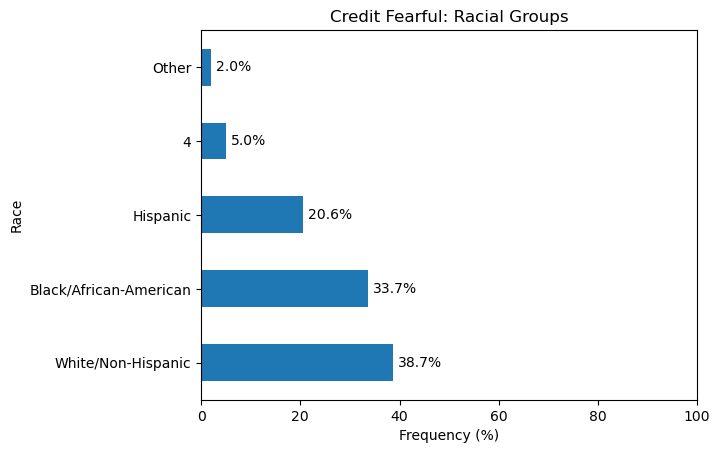

In [13]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize =True)*100

# Create bar chart of race_value_counts
race_value_counts.plot(kind = "barh")
plt.xlim((0,100))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");
# Add value labels
for i, (value, name) in enumerate(zip(race_value_counts, race_value_counts.index)):
    plt.text(value + 1, i, f"{value:.1f}%", va='center')  # +1 to offset the text

White/Non-Hispanic people appear to worry more about being denied credit, but this may simply reflect their larger share of the U.S. population, as the survey sample was designed to be population-representative.

Recreate the horizontal bar chart using the full dataset df instead of df_fear, and title it "SCF Respondents by Race".

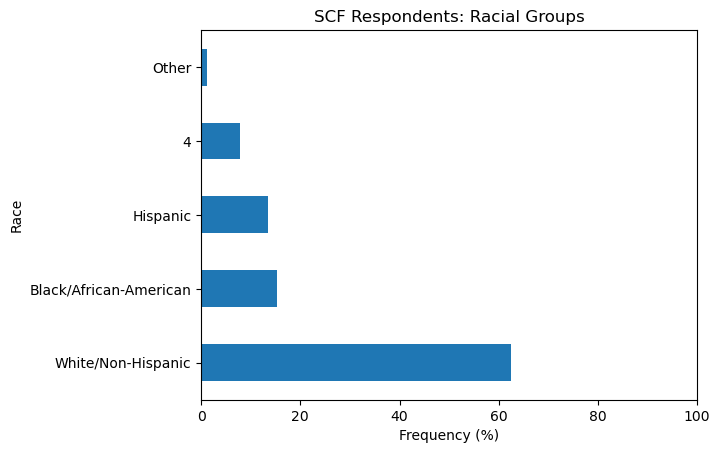

In [14]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize = True)*100

#create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0,100))
plt.xlabel('Frequency (%)')
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

To see whether credit denial concern varies by income, we’ll compare the full dataset and the fearful subgroup using the "INCCAT" income categories in a single side-by-side bar chart.

## Income


![My plot](image/INCCAT.png)



In [15]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}
df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()

    

)
df_inccat.head()

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.303982
1,0,60-79.9,0.162312
2,0,40-59.9,0.144492
3,0,0-20,0.140050
4,0,21-39.9,0.139162


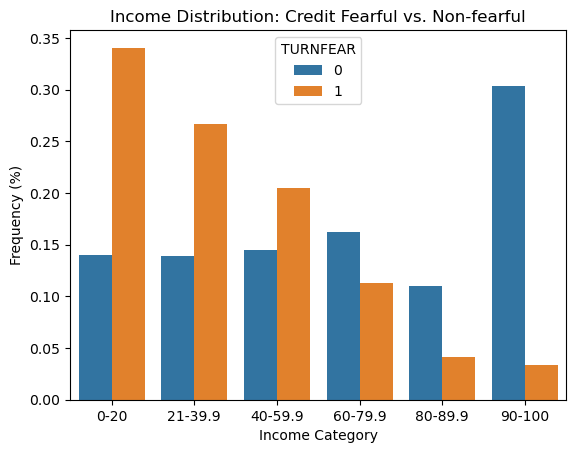

In [16]:
# Create bar chart of `df_inccat`
sns.barplot(
    x="INCCAT",
    y="frequency",
    hue="TURNFEAR",
    data=df_inccat,
    order= inccat_dict.values()
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Looking at the graph we can see that lower income groups are credit fearful.

### Assets

In [17]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5617763110086199


In [18]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.36494838615588227


In [19]:
df[["HOUSES","ASSET"]].head()

,HOUSES,ASSET
0,674000,957100.0
1,858000,1067300.0
2,757000,957200.0
3,710000,828600.0
4,765000,825600.0


Until now we were looking at the whole data now we are going to work only with few of the features.

In [20]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.561776,0.706685,0.307137,0.120137
HOUSES,0.561776,1.000000,0.384699,0.251876,0.186120
INCOME,0.706685,0.384699,1.000000,0.306534,0.096549
DEBT,0.307137,0.251876,0.306534,1.000000,0.086561
EDUC,0.120137,0.186120,0.096549,0.086561,1.000000


In [21]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.364948,0.893282,0.477171,0.110655
HOUSES,0.364948,1.000000,0.314501,0.676984,0.195174
INCOME,0.893282,0.314501,1.000000,0.456622,0.108845
DEBT,0.477171,0.676984,0.456622,1.000000,0.182570
EDUC,0.110655,0.195174,0.108845,0.182570,1.000000


### Education
![My plot](image/EDUC.png)

In [24]:
df_educ=(
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()


)
df_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.278689
1,0,8,0.174383
2,0,13,0.158967
3,0,9,0.111727
4,0,14,0.108539


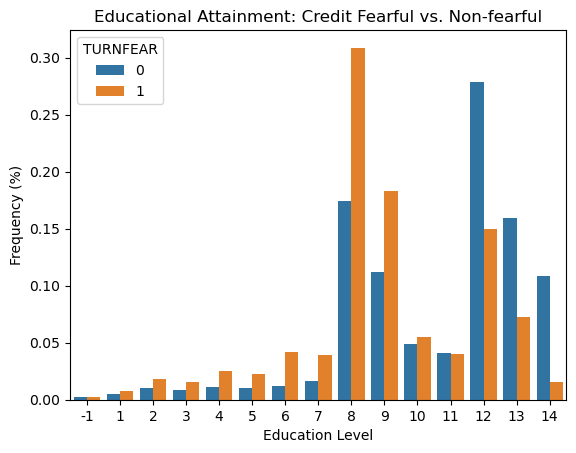

In [25]:
sns.barplot(
    x="EDUC",
    y="frequency",
    hue='TURNFEAR',
    data=df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In this plot, we can see that a much higher proportion of credit-fearful respondents have only a high school diploma, while university degrees are more common among the non-credit fearful.

### Debt

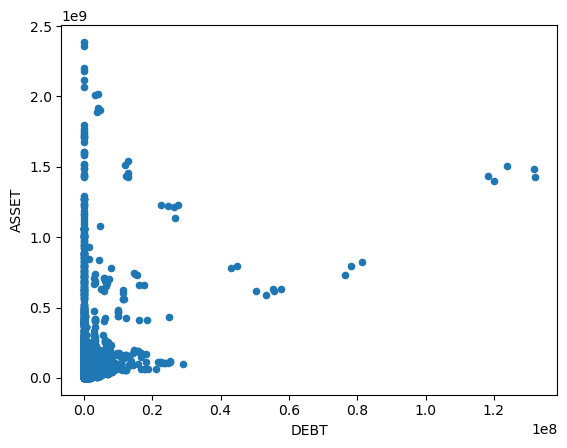

In [26]:
df.plot.scatter(x="DEBT", y="ASSET");

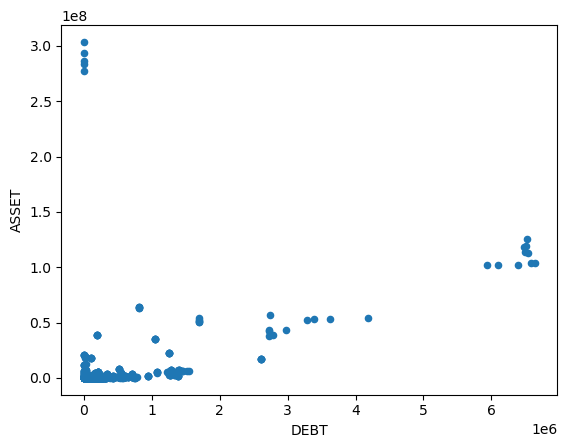

In [27]:
df_fear.plot.scatter(x="DEBT", y="ASSET");

You can see relationship in our df_fear graph is flatter than the one in our df graph, but they clearly are different

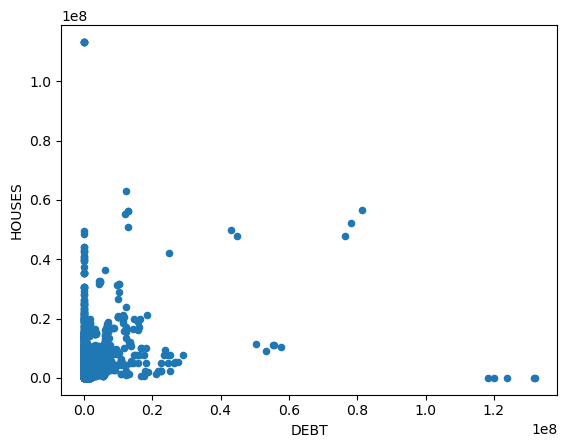

In [28]:
df.plot.scatter(x="DEBT", y="HOUSES");

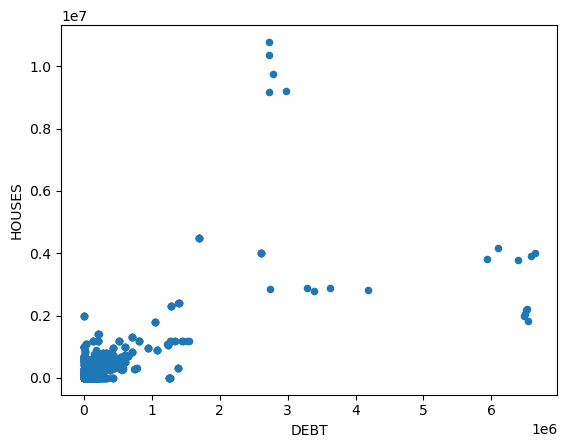

In [29]:
df_fear.plot.scatter(x="DEBT", y="HOUSES");